### TLC TRIP DATA 

### 2021 JEN ~ JUL YELLOW_TAXI_TRIP_RECORDS.PARQUET 

### TAXI_ZONE_MAPS & LOOKUP TABLES.CSV

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, sum, col


ss = SparkSession.builder.appName('test').getOrCreate()

23/10/17 04:19:05 WARN Utils: Your hostname, happy resolves to a loopback address: 127.0.1.1; using 192.168.219.109 instead (on interface wlp1s0)
23/10/17 04:19:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/10/17 04:19:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
dir = '/home/owen/workspace/spark_warehouse/data-engineering/01-spark/dataset/'

file = '03newdata.csv'

data = ss.read.csv(f"file:///{dir}/{file}", inferSchema = True, header = True)

In [3]:
df = data.drop('_c0')

df.show(5)

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [4]:
null_counts = [sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]


In [6]:
df.agg(*null_counts).show()

+-----------------+--------------------+--------------------+----------------+-----------------+---------------+----------------+------------+------------+----------+---------+-------------------+-----+---+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|request_datetime|on_scene_datetime|pickup_datetime|dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls|bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+----------------+-----------------+---------------+----------------+------------+------------+----------+---------+-------------------+-----+---+---------+--------------------+-----------+----+----------+-------------------+-----

In [7]:
df.createOrReplaceTempView('mobility_dataset')

In [8]:
ss.sql("select split(pickup_datetime, ' ') \
        from mobility_dataset").show()

+-----------------------------+
|split(pickup_datetime,  , -1)|
+-----------------------------+
|         [2020-03-01, 00:0...|
|         [2020-03-01, 00:2...|
|         [2020-03-01, 00:0...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:0...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:5...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:2...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:2...|
|         [2020-03-01, 00:4...|
|         [2020-03-01, 00:5...|
|         [2020-03-01, 00:5...|
|         [2020-03-01, 00:1...|
|         [2020-03-01, 00:3...|
|         [2020-03-01, 00:2...|
+-----------------------------+
only showing top 20 rows



In [9]:
ss.sql("select split(pickup_datetime, ' ')[0] as splited_date\
       from mobility_dataset").show()

+------------+
|splited_date|
+------------+
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
|  2020-03-01|
+------------+
only showing top 20 rows



In [10]:
ss.sql("select count(*)\
       from(select split(pickup_datetime, ' ')[0] as splited_date\
            from mobility_dataset)\
       group by splited_date").show()

+--------+
|count(1)|
+--------+
|  648990|
|  784260|
|  697880|
|  707879|
|  731165|
|  872012|
|  886071|
|  731222|
|  628940|
|  626474|
|  628601|
|  643257|
|  660914|
|  569397|
|  391518|
|  448125|
|  252773|
|  312298|
|  269233|
|  261900|
+--------+
only showing top 20 rows



In [11]:
ss.sql("select pickup_datetime as pickup_date, count(*) as trip_count\
       from (select split(pickup_datetime, ' ')[0] as pickup_datetime \
       from mobility_dataset)\
       group by pickup_datetime\
       order by pickup_datetime asc").show()

+-----------+----------+
|pickup_date|trip_count|
+-----------+----------+
| 2020-03-01|    784260|
| 2020-03-02|    648990|
| 2020-03-03|    697880|
| 2020-03-04|    707879|
| 2020-03-05|    731165|
| 2020-03-06|    872012|
| 2020-03-07|    886071|
| 2020-03-08|    731222|
| 2020-03-09|    628940|
| 2020-03-10|    626474|
| 2020-03-11|    628601|
| 2020-03-12|    643257|
| 2020-03-13|    660914|
| 2020-03-14|    569397|
| 2020-03-15|    448125|
| 2020-03-16|    391518|
| 2020-03-17|    312298|
| 2020-03-18|    269233|
| 2020-03-19|    252773|
| 2020-03-20|    261900|
+-----------+----------+
only showing top 20 rows



In [12]:
dir = '/home/owen/workspace/spark_warehouse/look_up_zone/*'


df2 = ss.read.csv(f"file:///{dir}", inferSchema = True, header = True)

In [13]:
df2.show()

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
|        11|     Brooklyn|          Bath Beach|   Boro Zone|
|        12|    Manhattan|        Battery Park| Yellow Zone|
|        13|    Manhattan|   Battery Park City| Yellow Zone|
|        14|     Brookly

In [14]:
df2.createOrReplaceTempView('region_dataset')

In [15]:
ss.sql("select region_dataset.Borough from mobility_dataset \
        join region_dataset on mobility_dataset.PULocationID = region_dataset.LocationID").show(5)

+---------+
|  Borough|
+---------+
|    Bronx|
|    Bronx|
|Manhattan|
|Manhattan|
| Brooklyn|
+---------+
only showing top 5 rows



In [20]:
# 승차

region_count = ss.sql('select borough, count(*) as trip_count\
                       from (select region_dataset.Borough as borough\
                       from mobility_dataset \
                       join region_dataset on mobility_dataset.PULocationID = region_dataset.LocationID)\
                       group by borough\
                       order by trip_count desc')

In [52]:
pd_region_count = region_count.toPandas()

/tmp/ipykernel_4618/1393464113.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd_region_count['borough'], rotation = 0)


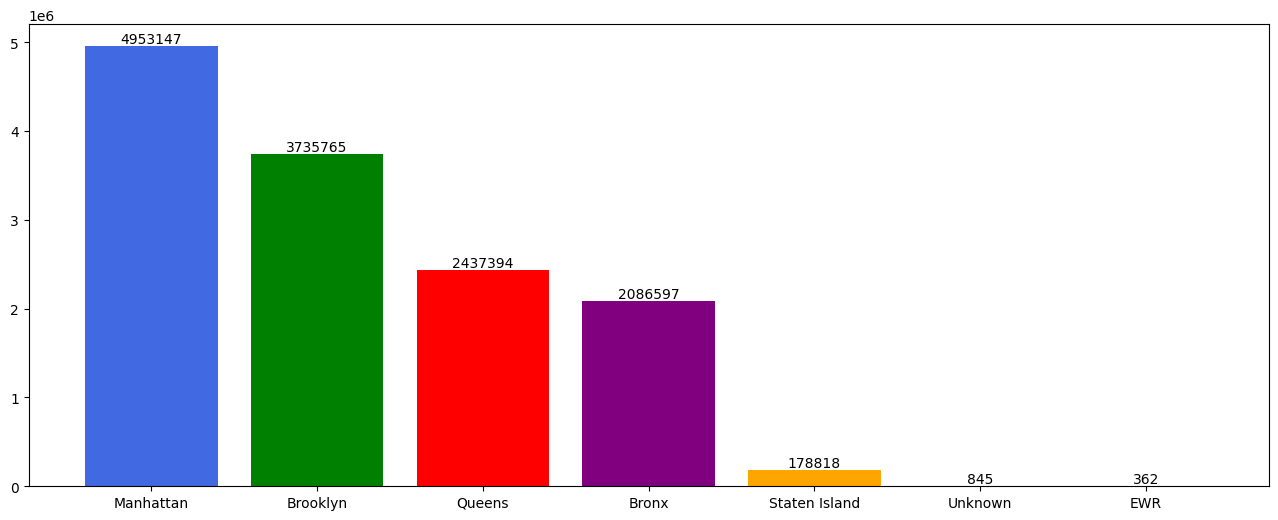

In [60]:
fig, ax = plt.subplots(figsize=(16, 6))
colors = ['royalblue', 'green', 'red', 'purple', 'orange']
ax.bar(pd_region_count['borough'], pd_region_count['trip_count'], color = colors)

for i, v in enumerate(pd_region_count['trip_count']):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom')

ax.set_xticklabels(pd_region_count['borough'], rotation = 0)

plt.show()

In [61]:
# 하차

drop = ss.sql('select borough, count(*) as trip_count\
               from (select region_dataset.Borough as borough\
               from mobility_dataset \
               join region_dataset on mobility_dataset.DOLocationID = region_dataset.LocationID)\
               group by borough\
               order by trip_count desc')

In [62]:
drop.show(10)

+-------------+----------+
|      borough|trip_count|
+-------------+----------+
|    Manhattan|   4553783|
|     Brooklyn|   3696684|
|       Queens|   2468416|
|        Bronx|   2043492|
|      Unknown|    387760|
|Staten Island|    177727|
|          EWR|     65066|
+-------------+----------+



In [63]:
pd_region_drop = drop.toPandas()

/tmp/ipykernel_4618/2719424374.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd_region_drop['borough'], rotation = 0)


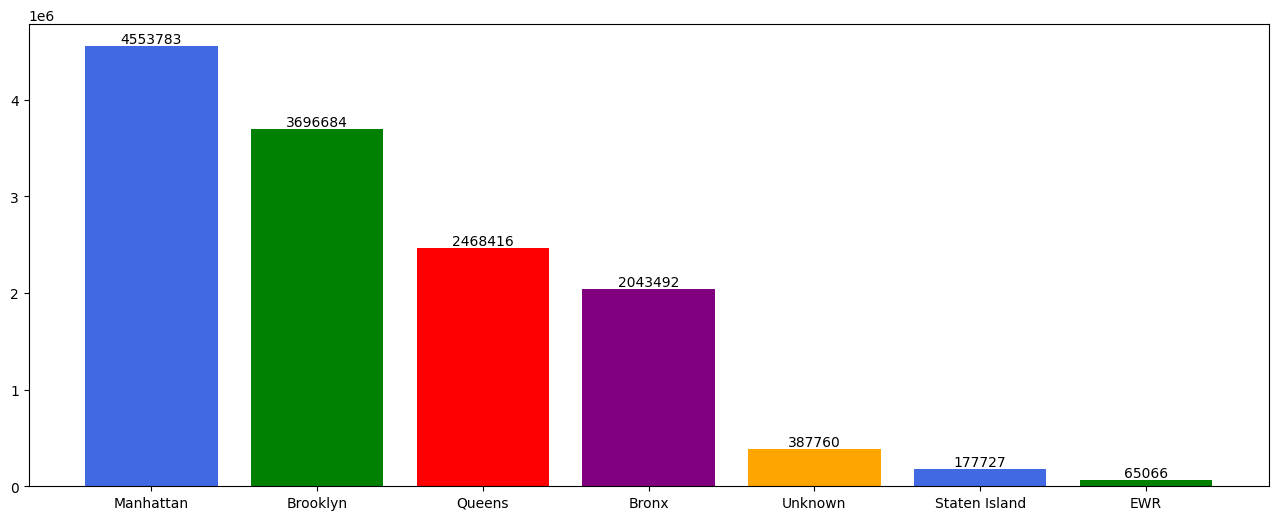

In [64]:
fig, ax = plt.subplots(figsize=(16, 6))
colors = ['royalblue', 'green', 'red', 'purple', 'orange']
ax.bar(pd_region_drop['borough'], pd_region_drop['trip_count'], color = colors)

for i, v in enumerate(pd_region_drop['trip_count']):
    ax.text(i, v, str(v), ha = 'center', va = 'bottom')

ax.set_xticklabels(pd_region_drop['borough'], rotation = 0)

plt.show()

In [65]:
dir2 = '/home/owen/workspace/spark_warehouse/data-engineering/01-spark/taxi_1~7/*'

txdf = ss.read.parquet(f"file:///{dir2}", inferSchema = True, header = True)

In [66]:
txdf.printSchema()

df2.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zo

In [67]:
df2.show(5)

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 5 rows



In [68]:
txdf.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+
|       2| 2021-03-01 09:22:02|  2021-03-01 09:23:22|            1.0|          0.0|       1.0|                 N|         264|         264|           2|        3.0|  0.5|    0.5|       0.

In [69]:
txdf.createOrReplaceTempView('taxi')

In [70]:
qry = """
select *
from taxi as t
left join region_dataset as pz
on t.PULocationID = pz.LocationID
"""

ss.sql(qry).show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------+---------+-----------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|LocationID|  Borough|             Zone|service_zone|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------+---------+-----------------+------------+
|       2| 2021-03-01 09:22:02|

In [71]:
query = """
select *
from taxi as t
left join region_dataset as pz
on t.PULocationID = pz.LocationID
left join region_dataset as dz
on t.DOLocationID = dz.LocationID
"""
                  
df3 = ss.sql(query)
df3.show(5)

23/10/17 13:56:05 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+----------+---------+-----------------+------------+----------+---------+--------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|airport_fee|LocationID|  Borough|             Zone|service_zone|LocationID|  Borough|          Zone|service_zone|
+--------+--------------------+---------------------+---------------+-------

In [72]:
query2 = """
select t.VendorID as vendor_id,
       to_date(t.tpep_pickup_datetime) as pickup_date,
       split(t.tpep_pickup_datetime, ' ')[1] as pickup_time,
       pz.Zone as pickup_zone,
       to_date(t.tpep_dropoff_datetime) as dropoff_date,
       split(t.tpep_dropoff_datetime, ' ')[1] as dropoff_time,
       dz.Zone as dropoff_zone,
       t.trip_distance as trip_distance,
       t.fare_amount as fare_amount,
       t.passenger_count as passenger_count,
       concat(cast((unix_timestamp(t.tpep_dropoff_datetime) - unix_timestamp(t.tpep_pickup_datetime))/3600 as int), ':',
              cast((unix_timestamp(t.tpep_dropoff_datetime) - unix_timestamp(t.tpep_pickup_datetime))/60 as int), ':',
             (unix_timestamp(t.tpep_dropoff_datetime) - unix_timestamp(t.tpep_pickup_datetime))%60) as operating_time,   
       t.tolls_amount as tolls_amount,
       t.total_amount as total_amount,
       t.payment_type as payment_type

from taxi as t
left join region_dataset as pz
on t.PULocationID = pz.LocationID
left join region_dataset as dz
on t.DOLocationID = dz.LocationID
"""

new_df = ss.sql(query2)
new_df.show(5)

+---------+-----------+-----------+-----------------+------------+------------+--------------+-------------+-----------+---------------+--------------+------------+------------+------------+
|vendor_id|pickup_date|pickup_time|      pickup_zone|dropoff_date|dropoff_time|  dropoff_zone|trip_distance|fare_amount|passenger_count|operating_time|tolls_amount|total_amount|payment_type|
+---------+-----------+-----------+-----------------+------------+------------+--------------+-------------+-----------+---------------+--------------+------------+------------+------------+
|        2| 2021-03-01|   09:22:02|               NV|  2021-03-01|    09:23:22|            NV|          0.0|        3.0|            1.0|        0:1:20|         0.0|         4.3|           2|
|        2| 2021-03-01|   09:24:48|   Manhattanville|  2021-03-01|    09:24:56|Manhattanville|          0.0|        2.5|            1.0|         0:0:8|         0.0|         3.8|           2|
|        2| 2021-03-01|   09:25:17|   Manhatt

In [73]:
new_df.createOrReplaceTempView('new')

In [74]:
ss.sql("select pickup_date, pickup_time \
        from new \
        where pickup_date < '2020-12-31'").show()

+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2009-01-01|   09:09:10|
| 2009-01-01|   08:18:19|
| 2009-01-01|   09:02:50|
| 2009-01-01|   09:39:56|
| 2009-01-01|   09:39:56|
| 2009-01-01|   09:04:50|
| 2009-01-01|   09:22:28|
| 2009-01-01|   10:07:48|
| 2009-01-01|   09:51:50|
| 2009-01-01|   08:03:14|
| 2009-01-01|   08:14:57|
| 2009-01-01|   12:21:35|
| 2009-01-02|   01:35:39|
| 2009-01-01|   20:59:10|
| 2009-01-01|   21:16:51|
| 2009-01-01|   21:34:19|
| 2009-01-01|   08:09:27|
| 2009-01-01|   08:22:53|
| 2009-01-01|   09:02:30|
| 2009-01-01|   09:33:07|
+-----------+-----------+
only showing top 20 rows



In [75]:
new_df.select('total_amount').describe().show()

+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|          15000936|
|   mean| 18.75540051097825|
| stddev|145.74310219085987|
|    min|            -647.8|
|    max|          398469.2|
+-------+------------------+



In [76]:
new_df.select('trip_distance').describe().show()

+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|         15000936|
|   mean|6.628556730059907|
| stddev| 671.724064548099|
|    min|              0.0|
|    max|        332541.19|
+-------+-----------------+



In [77]:
new_df.select('passenger_count').describe().show()

+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|          14166908|
|   mean|1.4253582362502812|
| stddev|1.0443336003189163|
|    min|               0.0|
|    max|               9.0|
+-------+------------------+



In [78]:
fliter_query = """
select date_trunc('MM', n.pickup_date) as month, count(*) as trips
from new as n
group by month
order by month;
"""

ss.sql(fliter_query).show()

+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2003-01-01 00:00:00|      2|
|2004-04-01 00:00:00|      1|
|2009-01-01 00:00:00|    137|
|2020-12-01 00:00:00|      1|
|2021-01-01 00:00:00|1355332|
|2021-02-01 00:00:00|1368619|
|2021-03-01 00:00:00|1910234|
|2021-04-01 00:00:00|2156143|
|2021-05-01 00:00:00|2522860|
|2021-06-01 00:00:00|2813017|
|2021-07-01 00:00:00|2825121|
|2021-08-01 00:00:00|  49452|
|2021-09-01 00:00:00|      3|
|2021-10-01 00:00:00|      3|
|2021-11-01 00:00:00|      5|
|2021-12-01 00:00:00|      5|
|2029-05-01 00:00:00|      1|
+-------------------+-------+



In [79]:
eda_df = ss.sql("""
                select *
                from new as n
                where (n.total_amount < 2000 and \
                n.trip_distance < 100 and \
                n.passenger_count <= 5 and \
                '2021-01-01' <= n.pickup_date and\
                n.pickup_date <= '2021-08-31') \
                """)
  
eda_df.createOrReplaceTempView('eda')

In [80]:
eda_df.describe().show()

ERROR:root:KeyboardInterrupt while sending command.                (5 + 7) / 12]
Traceback (most recent call last):
  File "/home/owen/anaconda3/envs/bigdata/lib/python3.8/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/owen/anaconda3/envs/bigdata/lib/python3.8/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/home/owen/anaconda3/envs/bigdata/lib/python3.8/socket.py", line 669, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [81]:
query_daily_trip_count = """
select e.pickup_date, count(*) as trips
from eda as e
group by e.pickup_date
"""

ss.sql(query_daily_trip_count)

DataFrame[pickup_date: date, trips: bigint]

In [82]:
pd_daily_trip_count = ss.sql(query_daily_trip_count).toPandas()

In [83]:
pd_daily_trip_count

,pickup_date,trips
0,2021-03-22,50324
1,2021-03-07,45891
2,2021-03-21,52985
3,2021-05-27,87713
4,2021-03-14,51163
...,...,...
211,2021-01-13,45447
212,2021-01-17,33767
213,2021-01-20,44718
214,2021-01-28,48994


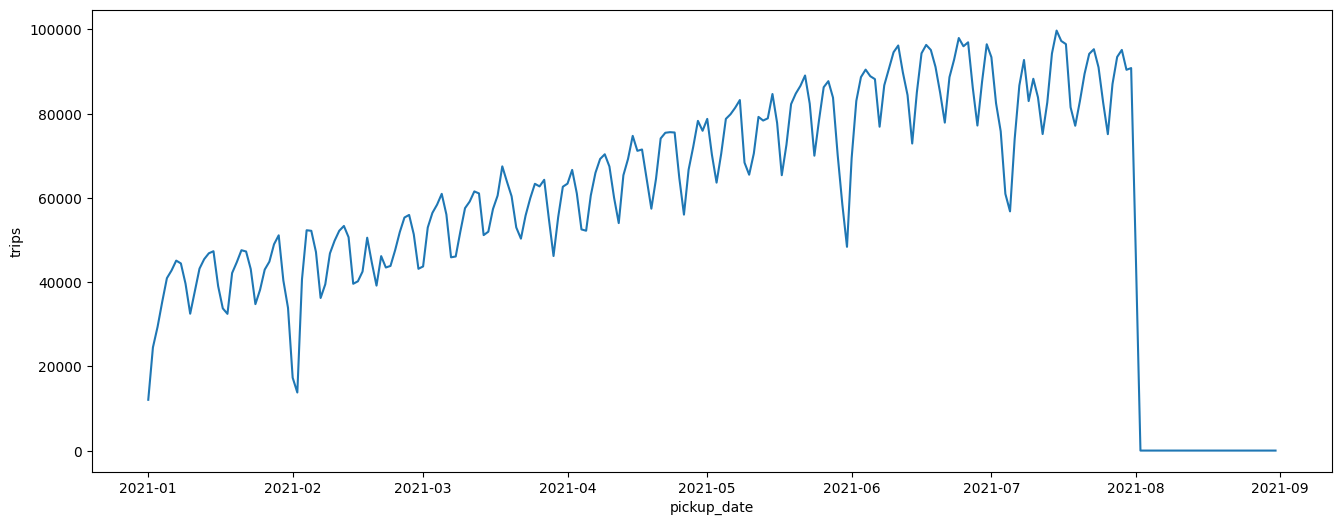

In [84]:
fig, ax = plt.subplots(figsize = (16,6)) # 액자
sns.lineplot(x = 'pickup_date', y = 'trips', data = pd_daily_trip_count)
plt.show()

In [85]:
query_daily_trip_count2 = """
select e.pickup_date, count(*) as trips, date_format(e.pickup_date, 'EEEE') as day
from eda as e
group by e.pickup_date, day
"""

pd_daily_trip_count2 = ss.sql(query_daily_trip_count2).toPandas()

In [86]:
ss.sql(query_daily_trip_count2).show()

+-----------+-----+---------+
|pickup_date|trips|      day|
+-----------+-----+---------+
| 2021-03-24|59905|Wednesday|
| 2021-03-27|64294| Saturday|
| 2021-03-03|56445|Wednesday|
| 2021-05-06|79864| Thursday|
| 2021-03-05|60958|   Friday|
| 2021-03-09|52015|  Tuesday|
| 2021-03-26|62726|   Friday|
| 2021-03-01|43725|   Monday|
| 2021-03-19|63846|   Friday|
| 2021-03-13|61056| Saturday|
| 2021-03-21|52985|   Sunday|
| 2021-03-14|51163|   Sunday|
| 2021-03-08|46085|   Monday|
| 2021-04-14|69275|Wednesday|
| 2021-03-23|55797|  Tuesday|
| 2021-03-02|52966|  Tuesday|
| 2021-05-27|87713| Thursday|
| 2021-03-16|57347|  Tuesday|
| 2021-03-04|58393| Thursday|
| 2021-03-25|63343| Thursday|
+-----------+-----+---------+
only showing top 20 rows



In [87]:
data2 = pd_daily_trip_count2.groupby('day').trips.median().to_frame().reset_index()
data2

,day,trips
0,Friday,71173.0
1,Monday,52204.0
2,Saturday,70183.0
3,Sunday,58471.0
4,Thursday,75091.5
5,Tuesday,62550.5
6,Wednesday,70728.0


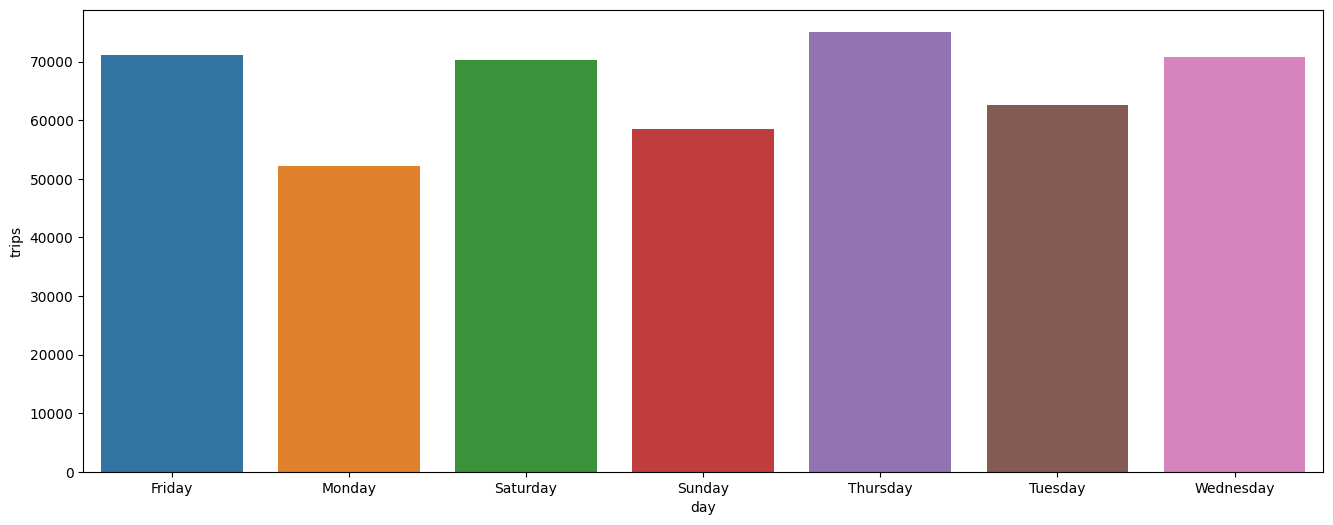

In [88]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x = 'day', y = 'trips', data = data2)
plt.show()

In [89]:
data2['sort_day'] = data2['day'].replace({
                                       'Sunday' : 0,
                                       'Monday' : 1,
                                       'Tuesday' : 2,
                                       'Wednesday' : 3,
                                       'Thursday' : 4,
                                       'Friday' : 5,
                                       'Saturday' : 6
                                       })

data2.sort_values(by='sort_day', inplace = True)
data2

,day,trips,sort_day
3,Sunday,58471.0,0
1,Monday,52204.0,1
5,Tuesday,62550.5,2
6,Wednesday,70728.0,3
4,Thursday,75091.5,4
0,Friday,71173.0,5
2,Saturday,70183.0,6


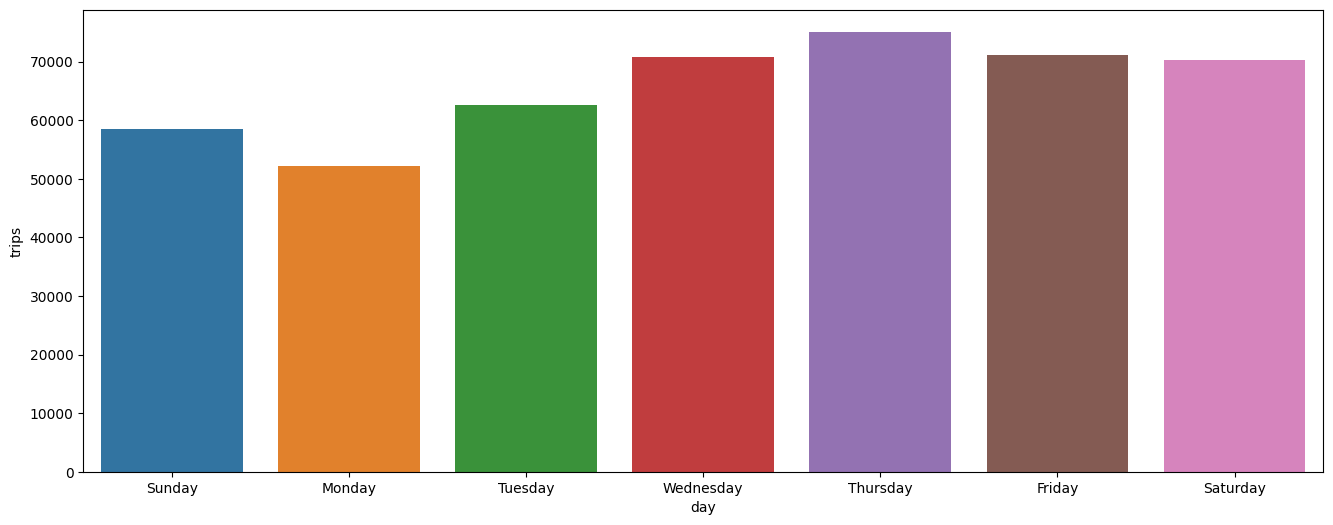

In [90]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x = 'day', y = 'trips', data = data2)
plt.show()

In [44]:
def weekday(data):
    import calendar
    return calendar.day_name(data.weekday())

ss.udf.register('weekday', weekday)

# 사용자 정의 함수

# 함수를 커스텀해서 쿼리할 때 사용가능

<function __main__.weekday(data)>

In [45]:
payment_type_category = {
    1 : 'CREDIT CARD',
    2 : 'CASH',
    3 : 'NO CHARGE',
    4 : 'DISPUTE',
    5 : 'UNKNOWN',
    6 : 'CANCEL',
}

def parse_payment_type(payment_type):
    return payment_type_category[payment_type]

ss.udf.register('parse_payment_type', parse_payment_type)

<function __main__.parse_payment_type(payment_type)>

In [46]:
parse_payment_query = """
select parse_payment_type(payment_type) as payment_type, \
    count(*) as trips, \
    round(mean(fare_amount), 2) as avg_fare_amount, \
    round(std(fare_amount), 2) as std_fare_amount
from eda
group by payment_type
"""

ss.sql(parse_payment_query).show()

+------------+--------+---------------+---------------+
|payment_type|   trips|avg_fare_amount|std_fare_amount|
+------------+--------+---------------+---------------+
| CREDIT CARD|10537182|          12.22|          10.81|
|   NO CHARGE|   80970|           6.69|          17.45|
|        CASH| 3249790|          11.91|          11.32|
|     DISPUTE|   59468|          -2.09|          19.45|
|     UNKNOWN|       1|           17.8|           null|
+------------+--------+---------------+---------------+



In [47]:
payment_df = ss.sql(parse_payment_query).toPandas()

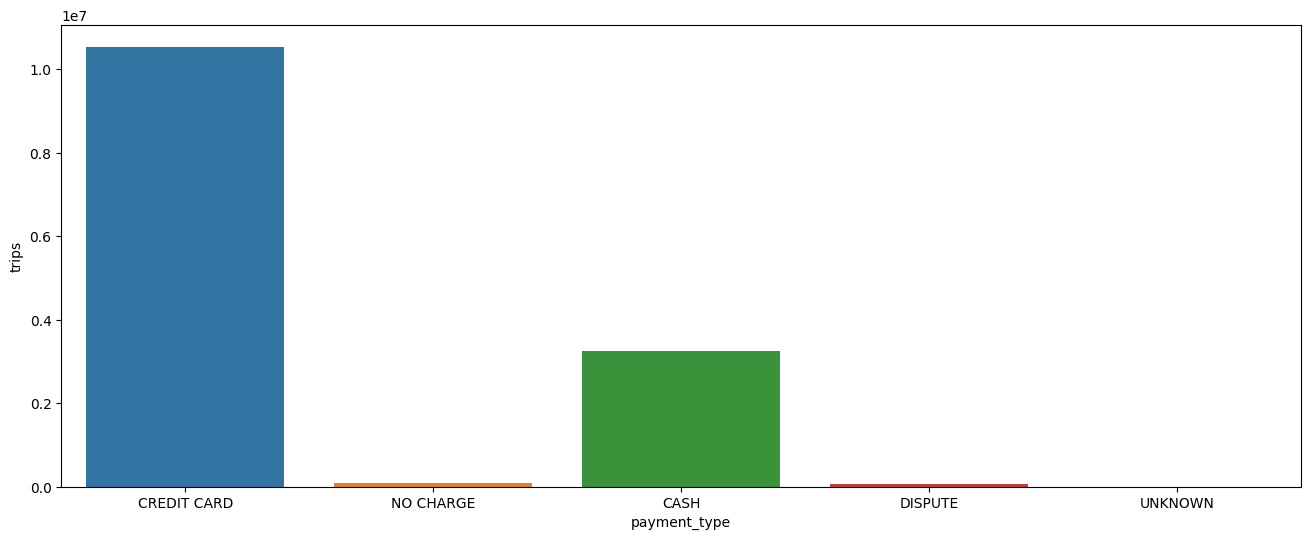

In [48]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = 'payment_type', y = 'trips', data = payment_df)
plt.show()

In [49]:
payment_df

,payment_type,trips,avg_fare_amount,std_fare_amount
0,CREDIT CARD,10537182,12.22,10.81
1,NO CHARGE,80970,6.69,17.45
2,CASH,3249790,11.91,11.32
3,DISPUTE,59468,-2.09,19.45
4,UNKNOWN,1,17.80,NaN
